In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sys
import os
from sklearn.base import clone 
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.train import TrainStationModel, OptModelSelectionMethods
from src.plotting import plot_r2_heatmap
from src.utils import CrossValidation as cv

# Load Data

In [2]:
proc = GatherFeatureDatasets(is_p=True)

In [3]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
train = pd.read_csv(f'{data_dir}/p.train.csv')
test = pd.read_csv(f'{data_dir}/p.test.csv')
holdout = pd.read_csv(f'{data_dir}/p.20230101.csv')
station_feature_dict, station_meta_dict, feature_names = proc.process_all_stations_datasets(train, 
                                                                  test, 
                                                                  holdout_df=holdout,
                                                                  scaler=False,
                                                                  linear_model=False,
                                                                  source_dist_type='dist')
feature_names

YHB
X shape: (3580, 45), y shape: (3580,)
X shape: (897, 45), y shape: (897,)
X shape: (363, 45), y shape: (363,)
YDC
X shape: (2928, 45), y shape: (2928,)
X shape: (725, 45), y shape: (725,)
X shape: (29, 45), y shape: (29,)
YWB
X shape: (3780, 45), y shape: (3780,)
X shape: (913, 45), y shape: (913,)
X shape: (357, 45), y shape: (357,)
MCID
X shape: (3389, 45), y shape: (3389,)
X shape: (832, 45), y shape: (832,)
X shape: (311, 45), y shape: (311,)
YHL
X shape: (3213, 45), y shape: (3213,)
X shape: (812, 45), y shape: (812,)
X shape: (374, 45), y shape: (374,)
YMR
X shape: (4154, 45), y shape: (4154,)
X shape: (1071, 45), y shape: (1071,)
X shape: (446, 45), y shape: (446,)
YHH
X shape: (4813, 45), y shape: (4813,)
X shape: (1215, 45), y shape: (1215,)
X shape: (397, 45), y shape: (397,)
B207
X shape: (1718, 45), y shape: (1718,)
X shape: (411, 45), y shape: (411,)
YPP
X shape: (1558, 45), y shape: (1558,)
X shape: (399, 45), y shape: (399,)
X shape: (217, 45), y shape: (217,)
YPM
X 

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

# Set Parameters
I believe the version of the model_selector used here also favors smaller gamma values (on accident). If there are multiple model scores within 1 st. err. of the best score that have the same min_C, then the gamma with the smaller index is selected. The smaller index should correspond to the smaller gamma.

In [4]:
# Model parameters
model = SVR(kernel='rbf')
model_scaler = True
outdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features'
phase = 'P'
model_selector = OptModelSelectionMethods.select_cv_ind_min_C
model_selector_tol = None

# CV Parameters
cv_random_state = 2652124
cv_folds_inner = 5
svr_C_range= 10**np.arange(-3, 5, dtype=float)
svr_gamma_range = 10**np.arange(-4, 3, dtype=float)
param_grid = [
    {'m__C': svr_C_range, 'm__gamma': svr_gamma_range},
]
scoring_method='r2'
n_jobs_inner = 5
print(param_grid)

[{'m__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'm__gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}]


# Select hyperparameters, train and evaluate the final model

YHB


1 St. Err. Tol=  0.05316
YDC
1 St. Err. Tol=  0.04996
YWB
1 St. Err. Tol=  0.05267
MCID
1 St. Err. Tol=  0.05093
YHL
1 St. Err. Tol=  0.05314
YMR
1 St. Err. Tol=  0.05338
YHH
1 St. Err. Tol=  0.05246
B207
1 St. Err. Tol=  0.05120
YPP
1 St. Err. Tol=  0.05008
YPM
1 St. Err. Tol=  0.05438
YLT
1 St. Err. Tol=  0.05214
H17A
1 St. Err. Tol=  0.05151
B208
1 St. Err. Tol=  0.05171
LKWY
1 St. Err. Tol=  0.05373
FLWY
1 St. Err. Tol=  0.04839
YGC
1 St. Err. Tol=  0.05112
YMC
1 St. Err. Tol=  0.04841
YML
1 St. Err. Tol=  0.05103
YUF
1 St. Err. Tol=  0.05386
B206
1 St. Err. Tol=  0.05335
B944
1 St. Err. Tol=  0.04535


/uufs/chpc.utah.edu/common/home/u1072028/PycharmProjects/featmag/src/plotting.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


YLA
1 St. Err. Tol=  0.04683
YTP
1 St. Err. Tol=  0.04750
YNR
1 St. Err. Tol=  0.05257
YNM
1 St. Err. Tol=  0.05580
YFT
1 St. Err. Tol=  0.05210
YMV
1 St. Err. Tol=  0.05488
YPC
1 St. Err. Tol=  0.04826
YSB
1 St. Err. Tol=  0.04852
YJC
1 St. Err. Tol=  0.05346
YMS
1 St. Err. Tol=  0.04599
YNE
1 St. Err. Tol=  0.05110
YPK
1 St. Err. Tol=  0.05164
B950
1 St. Err. Tol=  0.04822
YDD
1 St. Err. Tol=  0.04981


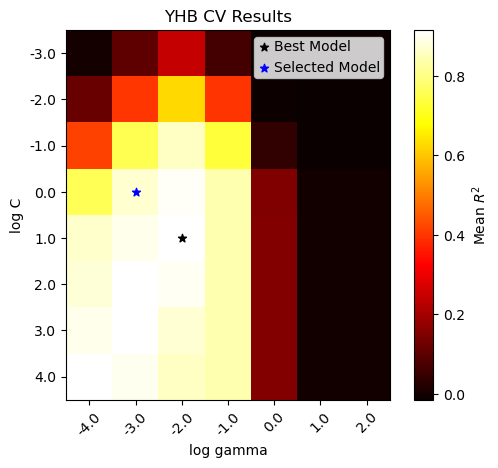

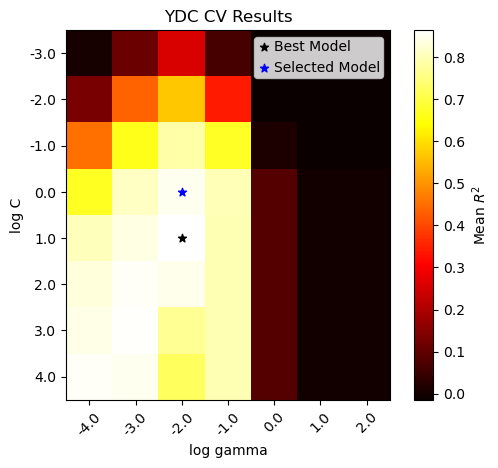

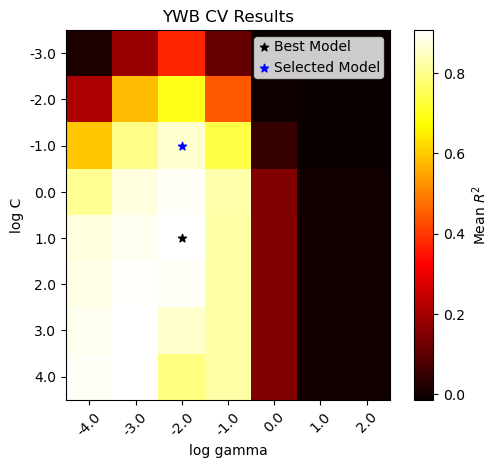

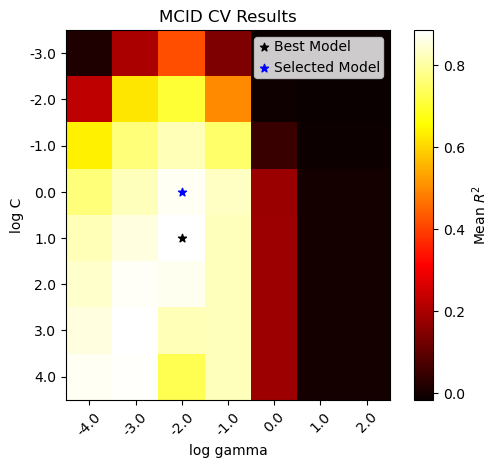

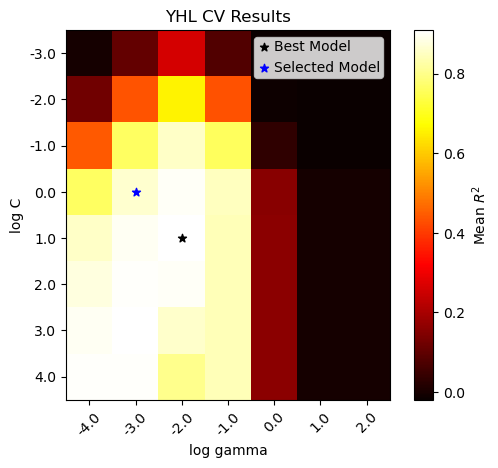

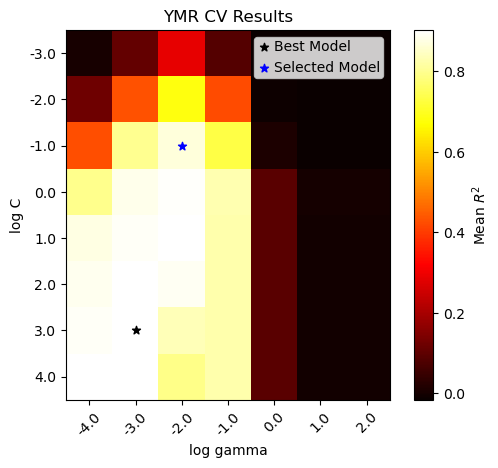

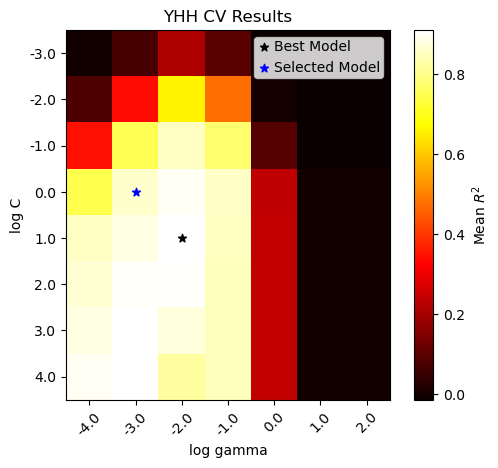

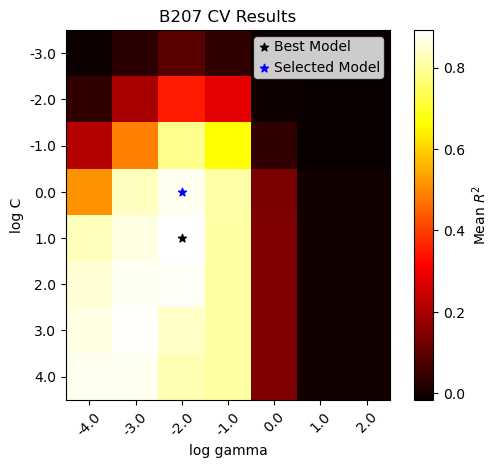

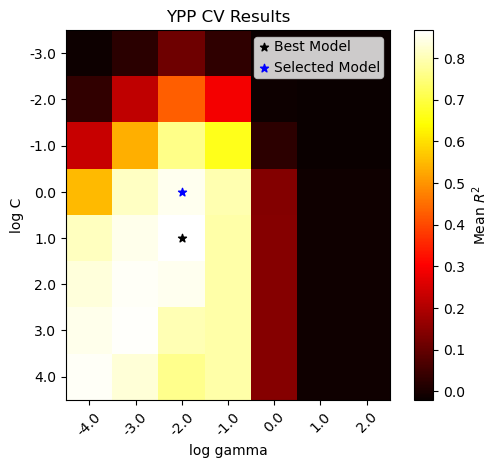

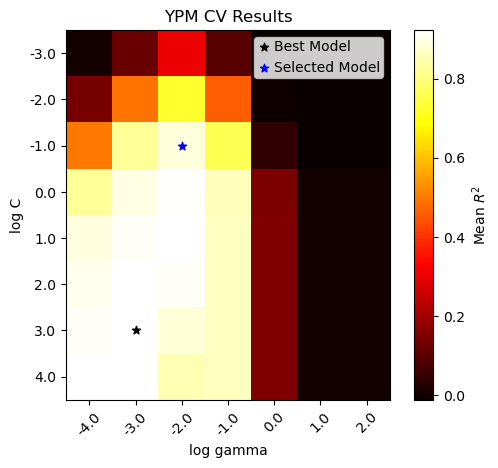

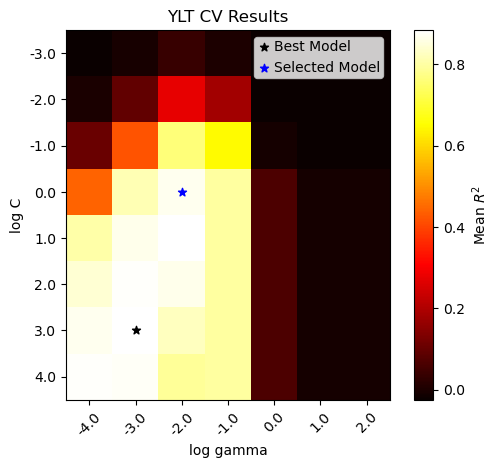

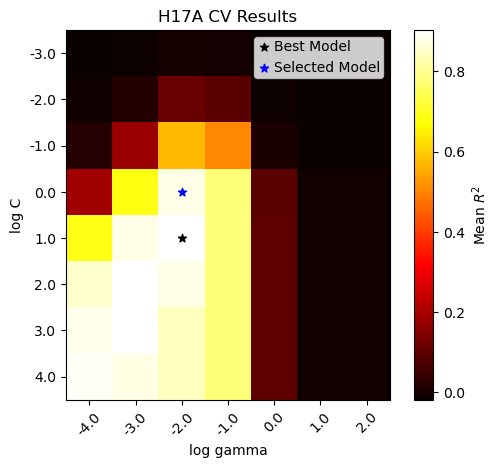

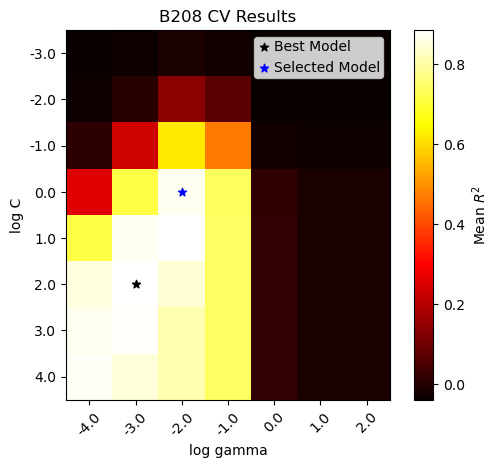

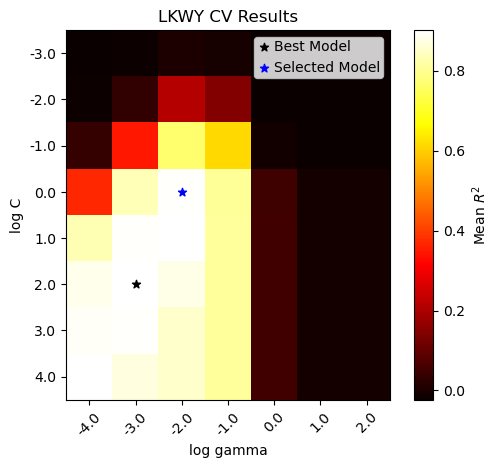

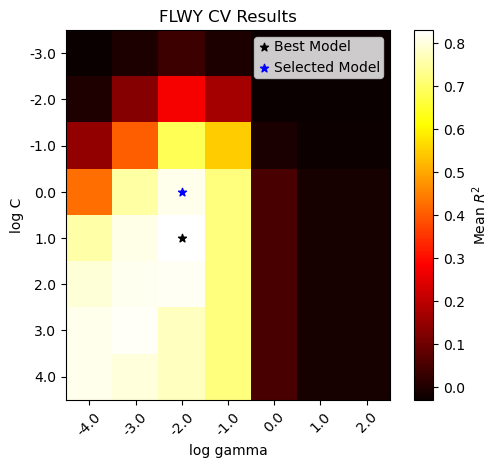

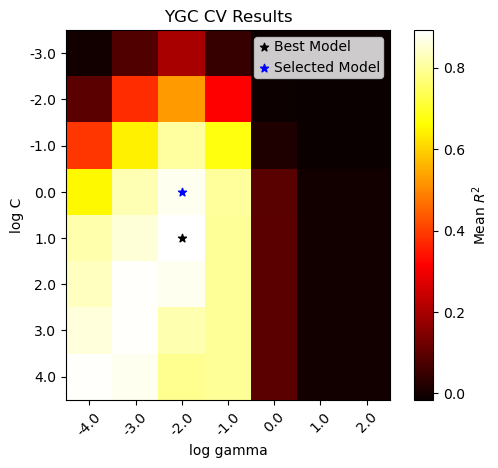

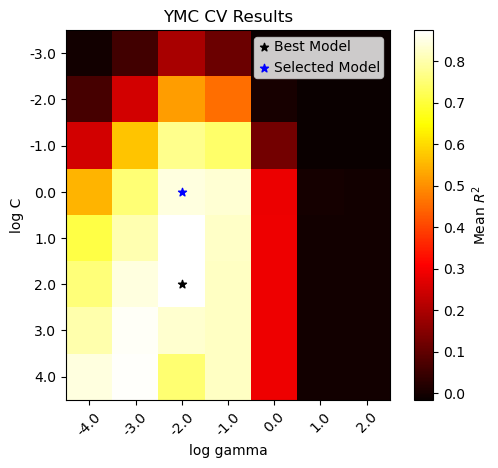

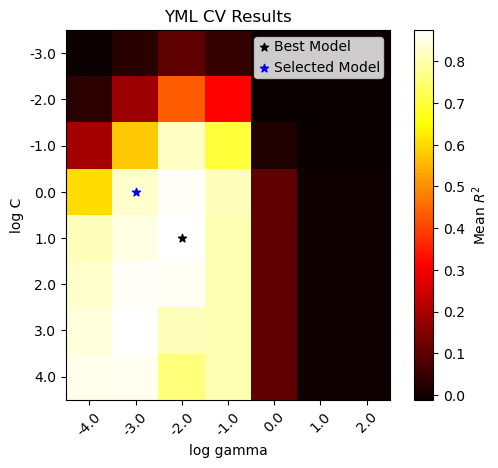

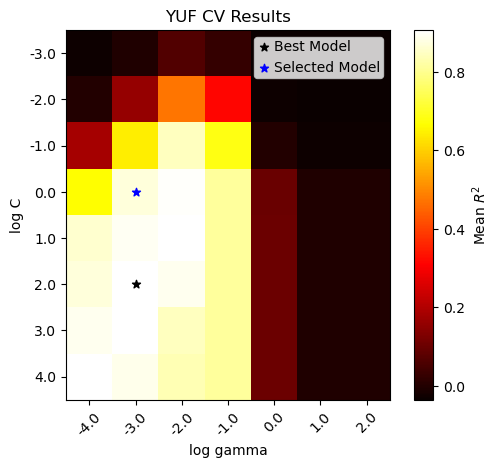

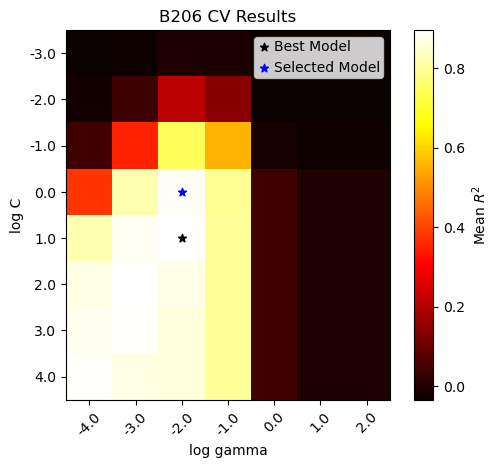

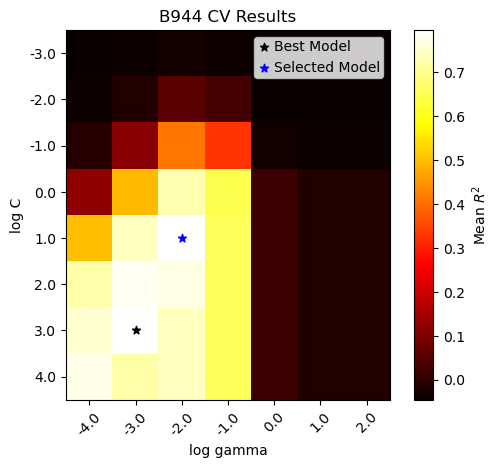

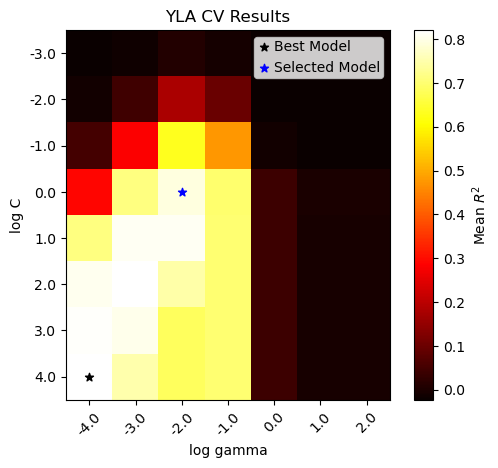

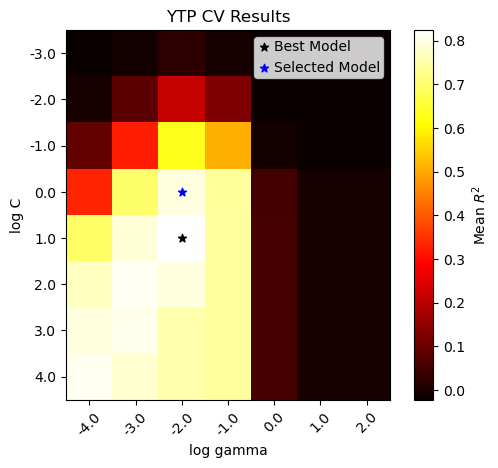

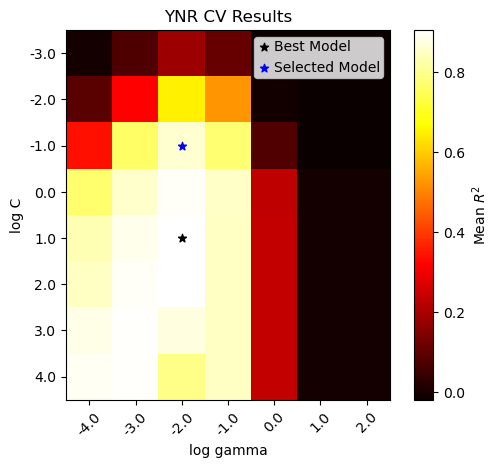

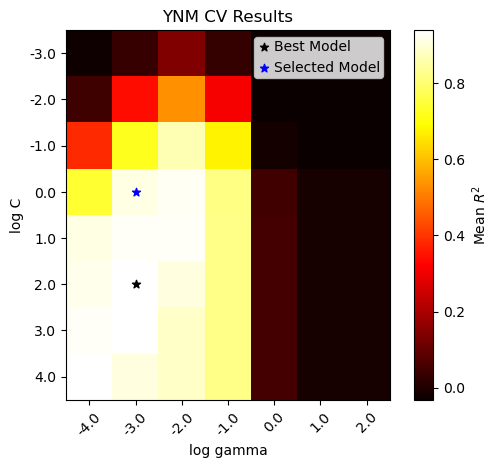

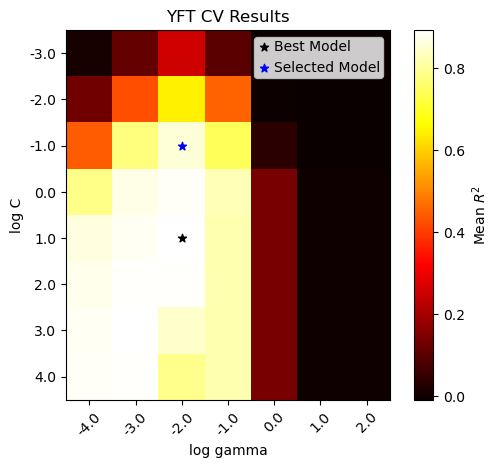

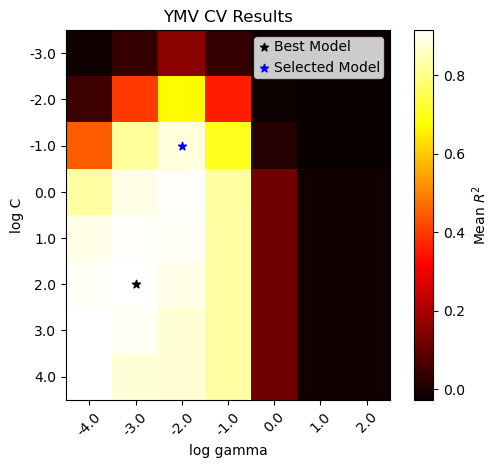

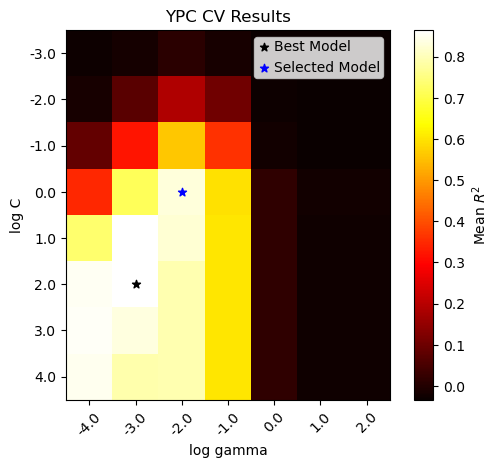

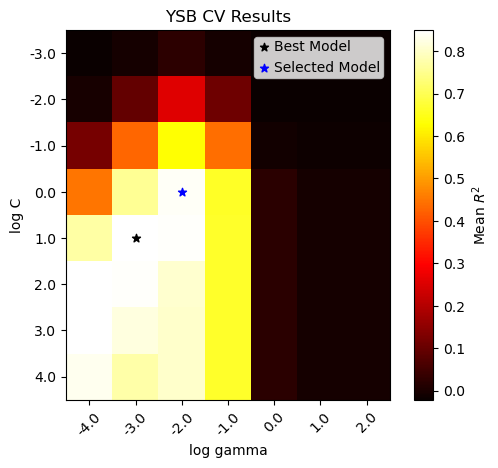

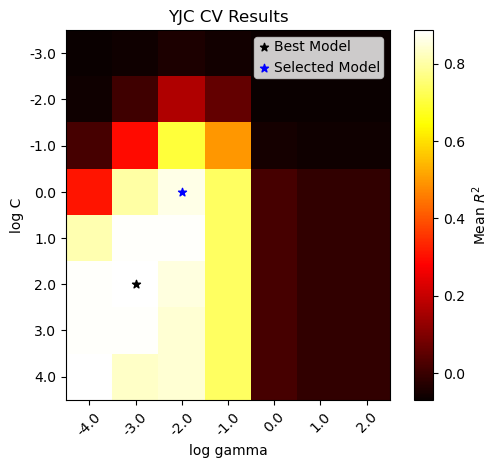

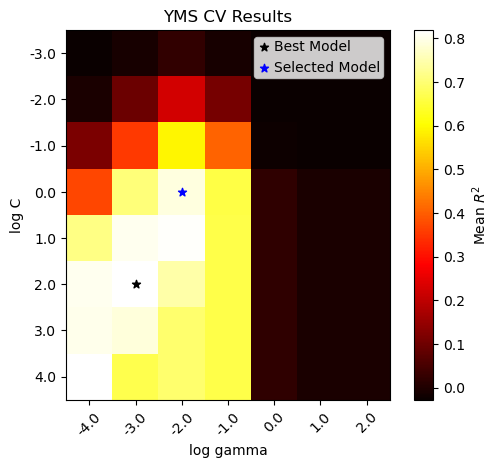

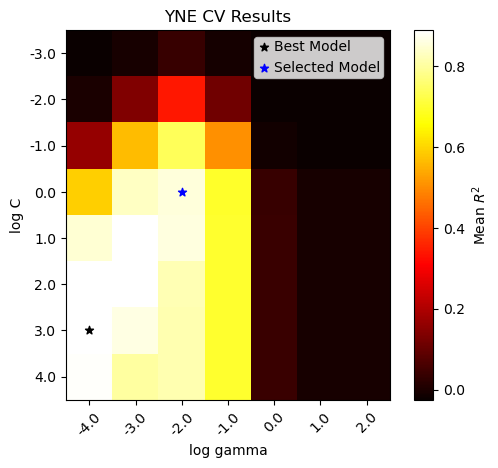

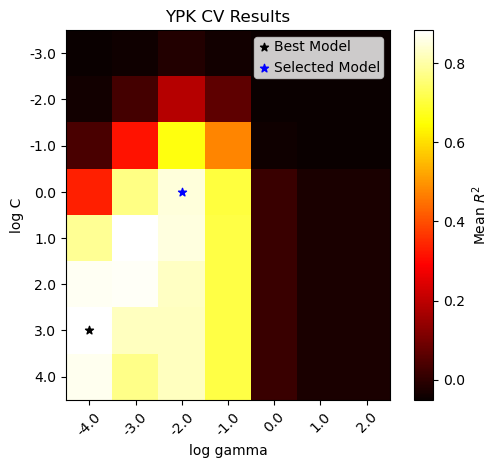

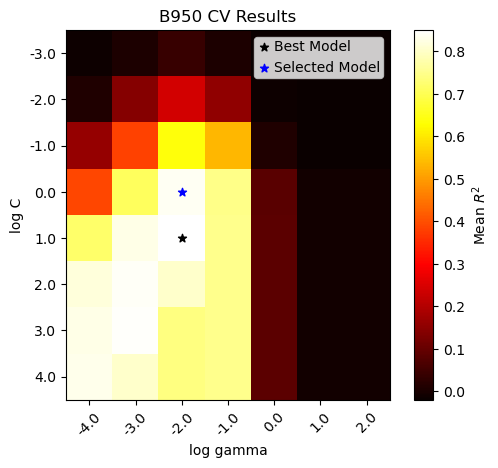

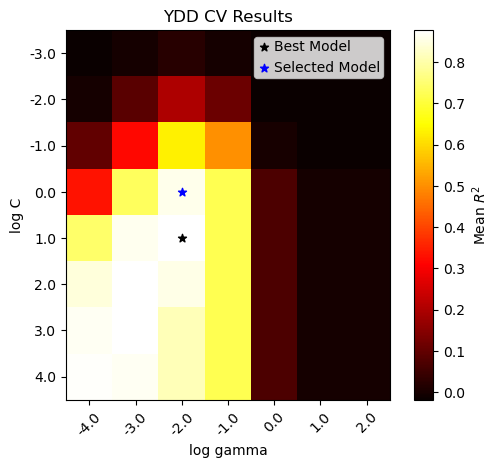

In [5]:
stations = station_feature_dict.keys()
results_dict_list = []

for station in stations:
    # Set up the grid search
    print(station)
    search, cv_inner = cv.setup_cv(clone(model),
                param_grid,
                model_scaler=model_scaler,
                scoring_method=scoring_method,
                n_jobs=n_jobs_inner,
                cv_folds=cv_folds_inner,
                cv_random_state=cv_random_state,
                refit_model = False)
    
    trainer = TrainStationModel(station,
                                phase,
                                station_feature_dict[station],
                                station_meta_dict[station])
    
    opt_pipeline = cv.make_simple_pipeline(clone(model), model_scaler)
    gs_results, train_results_dict = trainer.train_model_with_cv(search,
                                                                    opt_pipeline,
                                                                    model_selector_fn=model_selector,
                                                                    model_selector_tol=model_selector_tol
                                                                    )
    all_yhat, eval_results_dict = trainer.eval_all_splits(opt_pipeline)
    results_dict = trainer.format_results_dict(train_results_dict,eval_results_dict)
    trainer.save_all_predictions(all_yhat, outdir)
    trainer.save_model(opt_pipeline, outdir)
    plot_r2_heatmap(gs_results, 
                    svr_C_range,
                    svr_gamma_range,
                    train_results_dict['cv_ind_sel'], 
                    station,
                    outdir=outdir,
                    show=True)
    
    results_dict_list.append(results_dict)

results_df = pd.DataFrame(results_dict_list)
results_df.to_csv(os.path.join(outdir, 'all.stat.results.csv'), index=False)                                   